### K- Neighbors Classification

In [1]:
import sklearn
from sklearn import datasets

In [2]:
dataset_1 = datasets.load_breast_cancer()
print(dataset_1.keys())
print(68*"-")
print(dataset_1.feature_names)
print(68*"-")
dataset_1.data

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
--------------------------------------------------------------------
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
--------------------------------------------------------------------


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
print(dataset_1.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
import pandas as pd
import numpy as np

column_name = dataset_1.feature_names
x_df = pd.DataFrame(dataset_1.data,columns=column_name)
y_df = pd.DataFrame(dataset_1.target, columns=["Target"])
print("Sample :",len(x_df))
print("Feature :", (np.array(x_df)).shape[1])
x_df[12:23]

Sample : 569
Feature : 30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.36390,0.17670,0.3176,0.10230
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.69430,0.22080,0.3596,0.14310
15,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410
16,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
18,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


In [5]:
print(x_df.isnull().sum(), y_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64 Target    0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(x_df), np.array(y_df), random_state = 0)

print(10*"-"+"TRAIN DATA"+10*"-")
print("Shape'X' :",x_train.shape)
print("Shape'Y' :",y_train.shape)
print()
print(10*"-"+"TEST DATA"+10*"-")
print("Shape'X' :",x_test.shape)
print("Shape'Y' :",y_test.shape)

----------TRAIN DATA----------
Shape'X' : (426, 30)
Shape'Y' : (426, 1)

----------TEST DATA----------
Shape'X' : (143, 30)
Shape'Y' : (143, 1)


In [188]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=9, p=2)
# print(clf)
clf.fit(x_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [189]:
predict = clf.predict(x_test)
predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [190]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predict)
matrix = confusion_matrix(y_test, predict)
# print(matrix)
report = classification_report(y_test, predict, target_names=["Malignant","Benign"])
print(report)
print("Accuracy :",accuracy*100)

              precision    recall  f1-score   support

   Malignant       0.96      0.92      0.94        53
      Benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Accuracy : 95.8041958041958


In [27]:
def best_fit_k(features, labels, start_value=1, end_value=13):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(np.array(features), np.array(labels), random_state = 0)
    
    train_accuracy = list()
    test_accuracy = list()
    
    neighbour_setting = range(start_value, end_value)
    from sklearn.neighbors import KNeighborsClassifier
    for i in neighbour_setting:
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train, y_train.ravel())
        train_accuracy.append(clf.score(x_train, y_train))
        test_accuracy.append(clf.score(x_test, y_test))

    
    best_train_k_value = list()
    best_test_k_value = list()
    best_train_score = max(train_accuracy)
    best_test_score = max(test_accuracy)
    
    for i in range(len(train_accuracy)):
        if train_accuracy[i] == best_train_score:
            best_train_k_value.append(i+1)
            
    for i in range(len(test_accuracy)):
        if test_accuracy[i] == best_test_score:
            best_test_k_value.append(i+1)
    
    fig = plt.figure(figsize=(18, 6))
    plt.plot(neighbour_setting, train_accuracy, label="Training Accuracy")
    plt.plot(neighbour_setting, test_accuracy, label="Testing Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("N-Neighbour")
    plt.legend()
    plt.show()
    
    

    return best_train_score*100, best_test_score*100, (best_train_k_value, best_test_k_value)

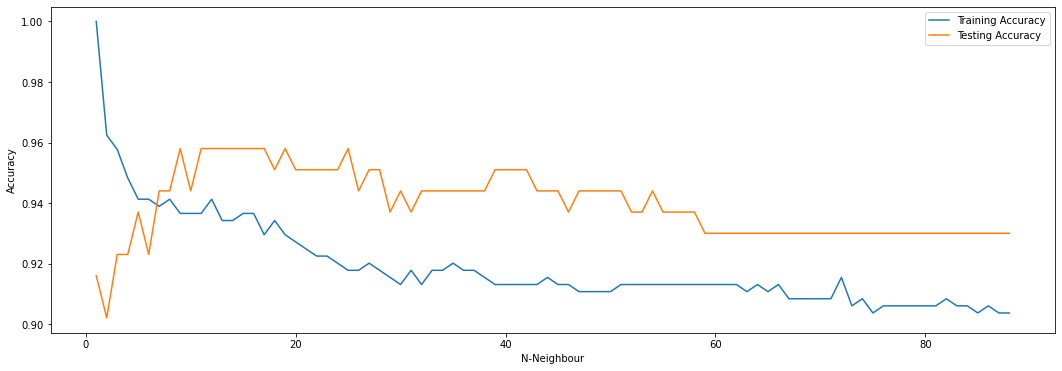

100.0
95.8041958041958
([1], [9, 11, 12, 13, 14, 15, 16, 17, 19, 25])


In [30]:
best_train_score, best_test_score, best_k_value = best_fit_k(x_df, y_df,start_value=1, end_value=89)
print(best_train_score)
print(best_test_score)
print(best_k_value)